In [39]:
# import thư viện
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline  
import numpy as np

#DECISION TREE
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

#K Nearest Number 
from sklearn import neighbors
from sklearn.metrics import accuracy_score

#DBSCAN 
from sklearn.cluster import DBSCAN

Ta sẽ tiến hành đọc 2 file dữ liệu từ 2 file heart.csv và statlog.csv

In [40]:
#reading the dataset heart and statlog
df_heart = pd.read_csv('heart.csv')
df_statlog = pd.read_csv('statlog.csv')

Sau khi đọc file dữ liệu từ heart và statlog ta sẽ tiến hành xem các thông tin có trong 2 file heart và statlog.csv


In [41]:
# xem các thông tin trong dataset heart
df_heart.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [42]:
# xem các thông tin trong dataset statlog 
df_statlog.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


In [43]:
# xem thông tin các cột dữ liệu trong dataset heart
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
df_statlog.head(12)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
5,65.0,1.0,4.0,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,7.0,1
6,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,2
8,60.0,1.0,4.0,140.0,293.0,0.0,2.0,170.0,0.0,1.2,2.0,2.0,7.0,2
9,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,2


In [45]:
# Kiểm tra dữ liệu có trống hay không trong data heart
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
# Kiểm tra dữ liệu trong statlog có trống hay không trong data statlog 
df_statlog.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [47]:
df_statlog.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [48]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [49]:
df_heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Sau đó ta sẽ tiến hành kiểm tra các dòng dữ liệu nào có bị trống hay bị trùng hay không 


<AxesSubplot:>

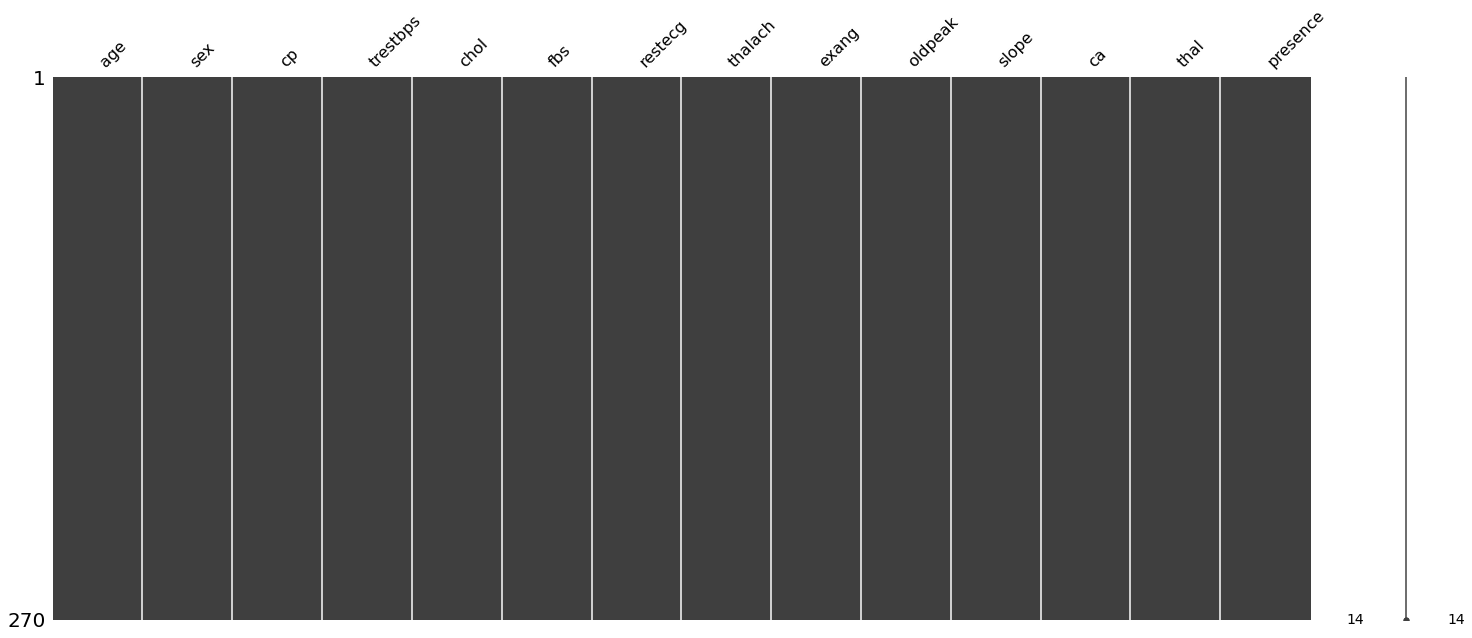

In [50]:
# Ta sẽ tiến hành kiểm tra các dòng dữ liệu xem có dòng dữ liệu nào bị trống hay không 
import missingno as msno 
msno.matrix(df_statlog)

<AxesSubplot:>

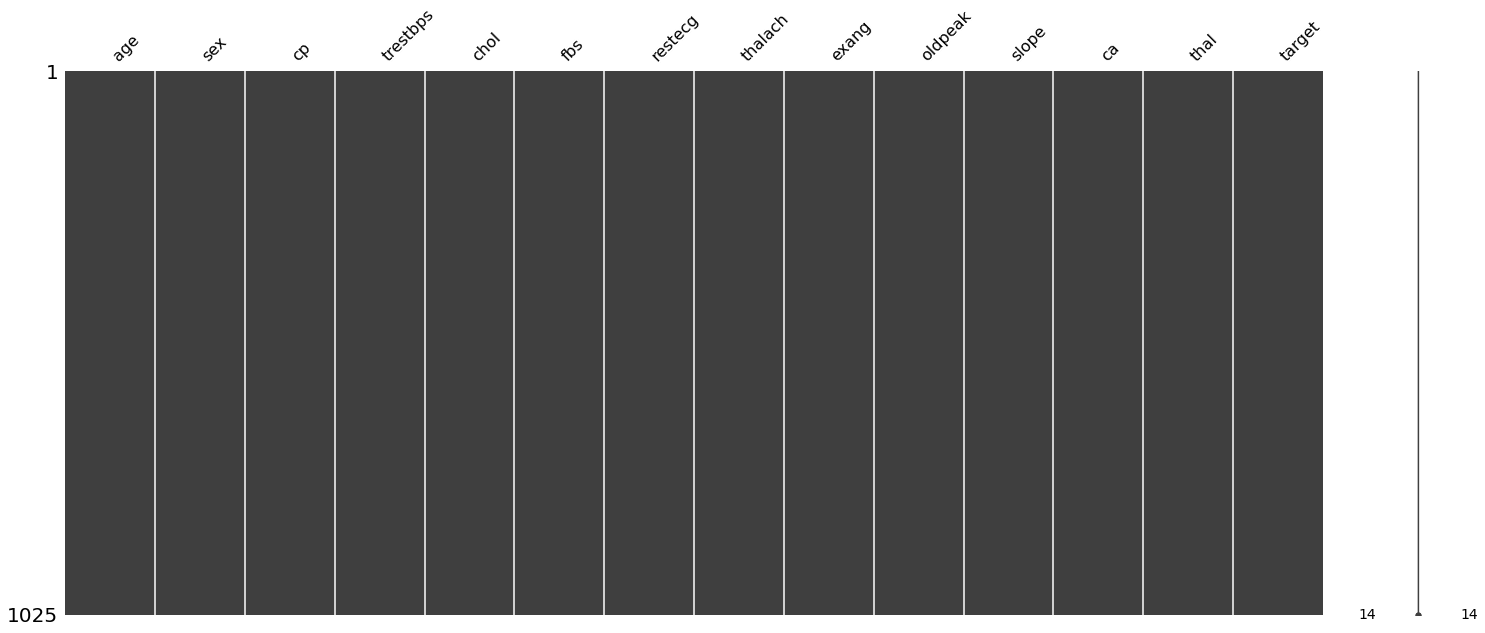

In [51]:
import missingno as msno 
msno.matrix(df_heart)

ÁP DỤNG HỆ SỐ TƯƠNG QUAN PEARSON, TA SẼ VẼ BIỂU ĐỒ TƯƠNG QUAN TRỰC HÓA BẰNG HEADMAP, MA TRẬN TƯƠNG QUAN 

<AxesSubplot:>

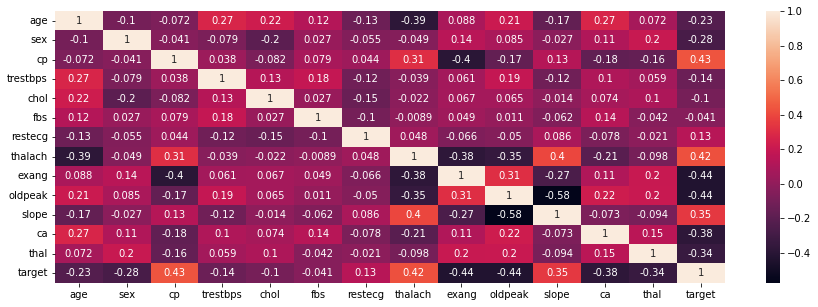

In [52]:
plt.figure(figsize=(15,5))
sns.heatmap(df_heart.corr(method='pearson'), annot=True)
# sns.heatmap(df_statlog.corr(method='pearson'), annot=True)

<AxesSubplot:>

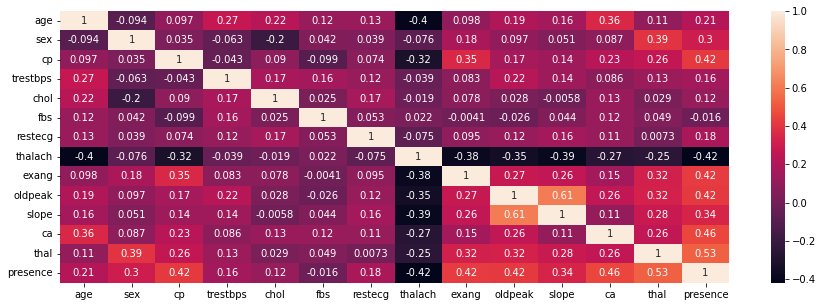

In [53]:
plt.figure(figsize=(15,5))
sns.heatmap(df_statlog.corr(method='pearson'), annot=True)

Ta tiến hành xóa cột chol, trestbps và fps vì độ tương quan cao nên ta để tránh gây ảnh hưởng đến kết quả đánh giá bài toán 


In [54]:
# Xóa trong data df_heart
del df_heart['chol']
del df_heart['fbs']
del df_heart['trestbps']

# Xóa trong data df_statlog
del df_statlog['chol']
del df_statlog['fbs']
del df_statlog['trestbps']

Tiến hành kiểm tra lại các data 

In [55]:
# kiểm tra data heart 
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1025 non-null   int64  
 1   sex      1025 non-null   int64  
 2   cp       1025 non-null   int64  
 3   restecg  1025 non-null   int64  
 4   thalach  1025 non-null   int64  
 5   exang    1025 non-null   int64  
 6   oldpeak  1025 non-null   float64
 7   slope    1025 non-null   int64  
 8   ca       1025 non-null   int64  
 9   thal     1025 non-null   int64  
 10  target   1025 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 88.2 KB


In [56]:
# kiểm tra data statlog
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   restecg   270 non-null    float64
 4   thalach   270 non-null    float64
 5   exang     270 non-null    float64
 6   oldpeak   270 non-null    float64
 7   slope     270 non-null    float64
 8   ca        270 non-null    float64
 9   thal      270 non-null    float64
 10  presence  270 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 23.3 KB


# ÁP DỤNG THUẬT TOÁN DBSCAN 

In [58]:
#input data
data_heart = df_heart[["thalach", "age"]]
data_statlog = df_statlog[["thalach", "age"]]

# specify and fit model 

model_heart = DBSCAN(eps = 9, min_samples = 5).fit(data_heart)
model_statlog = DBSCAN(eps = 8, min_samples=5).fit(data_statlog)

Biểu diễn bằng đồ thị data heart


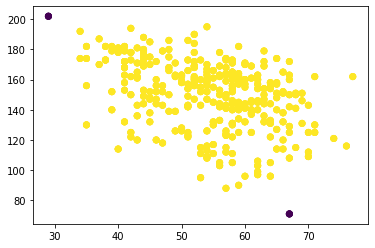

In [60]:
color_heart = model_heart.labels_
plt.scatter( data_heart["age"], data_heart["thalach"], c=color_heart)

Biểu diễn bằng đồ thị data_statlog

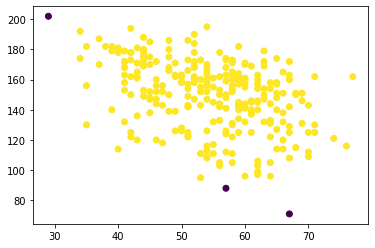

In [61]:
color_statlog = model_statlog.labels_
plt.scatter(data_statlog["age"], data_statlog["thalach"], c=color_statlog)